In [1]:
import numpy as np
#그림 그리기 위한 matploitlib
import matplotlib.pyplot as plt

#딥러닝을 위한 keras 프레임워크
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import ReduceLROnPlateau

In C:\Users\Notebook\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Notebook\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Notebook\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Notebook\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Notebook\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [4]:
# Load Dataset
# x_train : CT이미지
# y_train : 폐영역 마스크 이미지 (정답 set) 
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


In [8]:
# Build Model
#DownSampling
inputs = Input(shape=(256,256,1))

net = Conv2D(32,kernel_size=3, activation='relu',padding='same')(inputs)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net=Conv2D(64,kernel_size=3,activation='relu',padding='same')(net)
net=MaxPooling2D(pool_size=2,padding='same')(net)

net=Conv2D(128,kernel_size=3,activation='relu',padding='same')(net)
net=MaxPooling2D(pool_size=2,padding='same')(net)

net=Dense(128,activation='relu')(net)


In [9]:
#UpSampling
net=UpSampling2D(size=2)(net)
net=Conv2D(128,kernel_size=3,activation='sigmoid',padding='same')(net)

net=UpSampling2D(size=2)(net)
net=Conv2D(64,kernel_size=3,activation='sigmoid',padding='same')(net)

net=UpSampling2D(size=2)(net)
outputs = Conv2D(1,kernel_size=3,activation='sigmoid',padding='same')(net)

model=Model(inputs=inputs,outputs=outputs)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc','mse'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 128)       0     

In [10]:
#Training (반복 100번)

history = model.fit(x_train,y_train,validation_data=(x_val,y_val),
                   epochs=100,batch_size=32,callbacks =[
                       ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=10,verbose=1,mode='auto',min_lr=1e-05)
                   ])

Epoch 1/100
8/8 [==============================] - 57s 7s/step - loss: 0.6027 - acc: 0.6886 - mse: 0.2014 - val_loss: 0.5270 - val_acc: 0.7457 - val_mse: 0.1723 - lr: 0.0010
Epoch 2/100
8/8 [==============================] - 56s 7s/step - loss: 0.5055 - acc: 0.7624 - mse: 0.1654 - val_loss: 0.4865 - val_acc: 0.7467 - val_mse: 0.1610 - lr: 0.0010
Epoch 3/100
8/8 [==============================] - 58s 7s/step - loss: 0.4670 - acc: 0.7627 - mse: 0.1544 - val_loss: 0.4518 - val_acc: 0.7467 - val_mse: 0.1512 - lr: 0.0010
Epoch 4/100
8/8 [==============================] - 61s 8s/step - loss: 0.4409 - acc: 0.7624 - mse: 0.1459 - val_loss: 0.4318 - val_acc: 0.7467 - val_mse: 0.1442 - lr: 0.0010
Epoch 5/100
8/8 [==============================] - 65s 8s/step - loss: 0.4167 - acc: 0.7616 - mse: 0.1398 - val_loss: 0.3992 - val_acc: 0.7708 - val_mse: 0.1327 - lr: 0.0010
Epoch 6/100
8/8 [==============================] - 63s 8s/step - loss: 0.4033 - acc: 0.7651 - mse: 0.1339 - val_loss: 0.3905 - val

Epoch 48/100
8/8 [==============================] - 59s 7s/step - loss: 0.0438 - acc: 0.9823 - mse: 0.0096 - val_loss: 0.1287 - val_acc: 0.9685 - val_mse: 0.0228 - lr: 0.0010
Epoch 49/100
8/8 [==============================] - 59s 7s/step - loss: 0.0467 - acc: 0.9815 - mse: 0.0103 - val_loss: 0.1224 - val_acc: 0.9691 - val_mse: 0.0224 - lr: 0.0010
Epoch 50/100
8/8 [==============================] - 60s 8s/step - loss: 0.0437 - acc: 0.9826 - mse: 0.0095 - val_loss: 0.1273 - val_acc: 0.9646 - val_mse: 0.0255 - lr: 0.0010
Epoch 51/100
8/8 [==============================] - 59s 7s/step - loss: 0.0455 - acc: 0.9818 - mse: 0.0101 - val_loss: 0.1288 - val_acc: 0.9685 - val_mse: 0.0226 - lr: 0.0010
Epoch 52/100
8/8 [==============================] - 60s 8s/step - loss: 0.0502 - acc: 0.9794 - mse: 0.0117 - val_loss: 0.1213 - val_acc: 0.9677 - val_mse: 0.0233 - lr: 0.0010
Epoch 53/100
8/8 [==============================] - 57s 7s/step - loss: 0.0511 - acc: 0.9797 - mse: 0.0117 - val_loss: 0.1234

8/8 [==============================] - 63s 8s/step - loss: 0.0353 - acc: 0.9858 - mse: 0.0071 - val_loss: 0.1226 - val_acc: 0.9710 - val_mse: 0.0210 - lr: 1.0000e-05
Epoch 92/100
8/8 [==============================] - 59s 7s/step - loss: 0.0353 - acc: 0.9857 - mse: 0.0071 - val_loss: 0.1225 - val_acc: 0.9710 - val_mse: 0.0210 - lr: 1.0000e-05
Epoch 93/100
8/8 [==============================] - 59s 7s/step - loss: 0.0353 - acc: 0.9858 - mse: 0.0071 - val_loss: 0.1226 - val_acc: 0.9710 - val_mse: 0.0210 - lr: 1.0000e-05
Epoch 94/100
8/8 [==============================] - 60s 7s/step - loss: 0.0353 - acc: 0.9858 - mse: 0.0071 - val_loss: 0.1226 - val_acc: 0.9710 - val_mse: 0.0210 - lr: 1.0000e-05
Epoch 95/100
8/8 [==============================] - 60s 7s/step - loss: 0.0353 - acc: 0.9858 - mse: 0.0071 - val_loss: 0.1226 - val_acc: 0.9710 - val_mse: 0.0210 - lr: 1.0000e-05
Epoch 96/100
8/8 [==============================] - 60s 7s/step - loss: 0.0353 - acc: 0.9858 - mse: 0.0071 - val_loss:

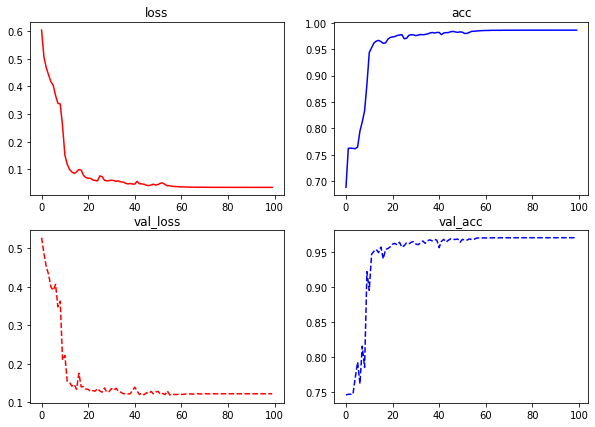

In [11]:
#Evaluation

fig, ax=plt.subplots(2,2,figsize=(10,7))

ax[0,0].set_title('loss')
ax[0,0].plot(history.history['loss'],'r')

ax[0,1].set_title('acc')
ax[0,1].plot(history.history['acc'],'b')

ax[1,0].set_title('val_loss')
ax[1,0].plot(history.history['val_loss'],'r--')

ax[1,1].set_title('val_acc')
ax[1,1].plot(history.history['val_acc'],'b--')

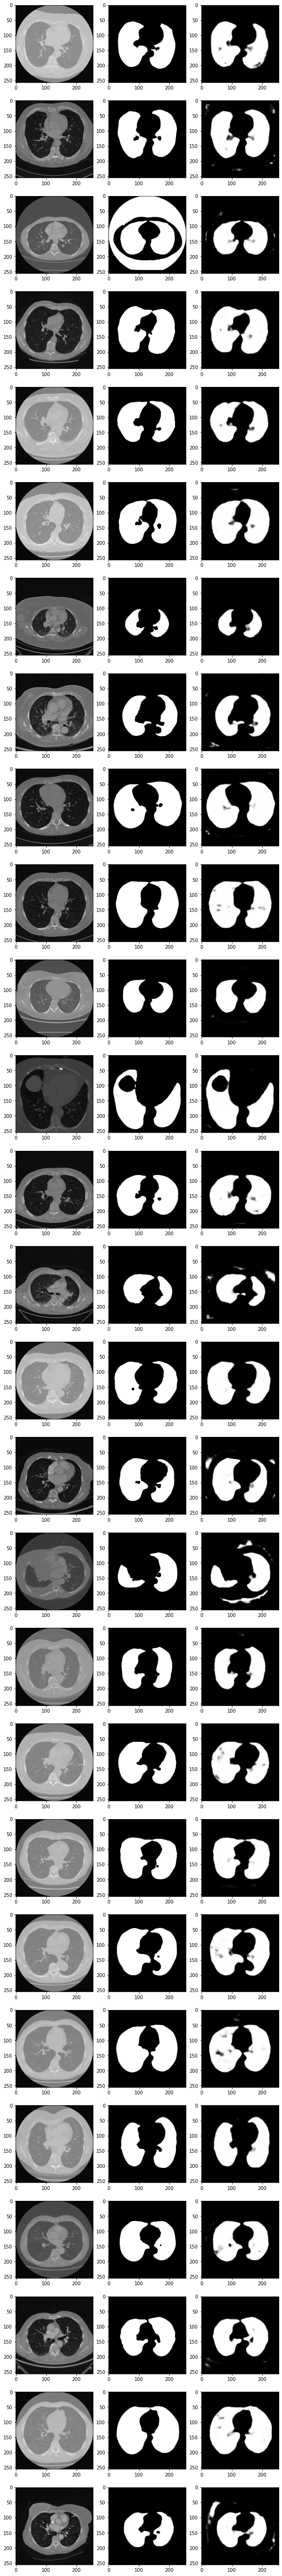

In [15]:
#Precit (테스트 데이터 예측)

preds = model.predict(x_val)

fig,ax=plt.subplots(len(x_val),3,figsize=(10,100))

for i,pred in enumerate(preds):
    ax[i,0].imshow(x_val[i].squeeze(),cmap='gray')
    ax[i,1].imshow(y_val[i].squeeze(),cmap='gray')
    ax[i,2].imshow(pred.squeeze(),cmap='gray')